<a href="https://colab.research.google.com/github/JavierDoom/Programa-de-Fidelizaci-n-de-Clientes./blob/main/An%C3%A1lisis_del_Comportamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 **Proyecto Sprint 11 — Análisis del Comportamiento del Usuario y Test A/A/B**

## 📊 *TripleTen Data Analysis Bootcamp*

---

### 👨‍💻 **Autor del Proyecto:**  
**Francisco Javier Manjarrez Domingue**

### 📅 **Fecha de entrega:**  
*Noviembre 2025*

### 🧩 **Descripción general del proyecto**
Este proyecto analiza el comportamiento de los usuarios dentro de una aplicación de productos alimenticios.  
El objetivo es estudiar el **embudo de conversión** y evaluar los resultados de un **test A/A/B** que busca determinar el impacto de un cambio tipográfico en la experiencia de usuario.

---

### 🎯 **Objetivos específicos**
1. Explorar los datos de uso y detectar patrones de interacción.  
2. Construir y analizar el embudo de conversión del usuario.  
3. Validar experimentalmente los resultados del test A/A/B.  
4. Determinar si las nuevas fuentes tipográficas afectan la conversión de usuarios.  

---

### 🧮 **Estructura del proyecto**
| Etapa | Descripción |
|-------|--------------|
| **1.** Carga y preparación de los datos | Limpieza, formatos y verificación de registros. |
| **2.** Análisis exploratorio | Evaluación de eventos, usuarios y periodo de actividad. |
| **3.** Embudo de conversión | Cálculo y visualización del flujo de usuarios. |
| **4.** Test A/A/B | Comparación estadística de grupos experimentales. |
| **5.** Conclusiones | Síntesis de resultados y recomendaciones finales. |

In [ ]:
# -------------------------- IMPORTS --------------------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import sqrt
from datetime import timedelta
from IPython.display import display

In [ ]:
# --------------------- BLOQUE 1: IMPORTACIÓN Y CARGA DE DATOS ---------------------

# 📁 Ruta del dataset (ajústala si tu archivo está en otro lugar)
DATA_PATH = '/datasets/logs_exp_us.csv'

# ✅ Verificamos si el archivo existe
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(
        f"Archivo no encontrado: {DATA_PATH}\n"
        "Asegúrate de colocar 'logs_exp_us.csv' en la carpeta '/datasets/'."
    )

# 📥 Cargamos el archivo CSV
df = pd.read_csv(DATA_PATH)

# 🔍 Mostramos las primeras filas para confirmar la carga
print("✅ Archivo cargado correctamente. Primeras filas:\n")
print(df.head())

✅ Archivo cargado correctamente. Primeras filas:

      EventName\tDeviceIDHash\tEventTimestamp\tExpId
0  MainScreenAppear\t4575588528974610257\t1564029...
1  MainScreenAppear\t7416695313311560658\t1564053...
2  PaymentScreenSuccessful\t3518123091307005509\t...
3  CartScreenAppear\t3518123091307005509\t1564054...
4  PaymentScreenSuccessful\t6217807653094995999\t...


## 🧩 **Bloque 1 — Importación y carga de datos**

En este primer paso preparamos nuestro entorno de trabajo y cargamos el archivo de registros de eventos.

### 🎯 **Objetivos del bloque**

- Establecer la ruta del archivo `logs_exp_us.csv`.
- Verificar que el archivo exista en la carpeta `/datasets/`.
- Cargar el dataset sin alterar aún los tipos de datos.
- Mostrar las primeras filas para confirmar la carga exitosa.

> ⚙️ **Consejo:** Este paso garantiza que el archivo esté correctamente ubicado antes de continuar con el análisis.


In [ ]:
# --------------------- BLOQUE 2: LIMPIEZA Y ESTANDARIZACIÓN DE COLUMNAS ---------------------

# 📋 Normalizamos los nombres de las columnas (minúsculas y guiones bajos)
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

print("\n➡️ Columnas detectadas en el dataset:")
print(df.columns.tolist())

# 🔁 Renombramos las columnas más importantes a nombres estandarizados
col_rename = {}

for c in df.columns:
    if 'event' in c and 'name' in c:
        col_rename[c] = 'event_name'
    if 'device' in c:
        col_rename[c] = 'device_id'
    if 'timestamp' in c:
        col_rename[c] = 'event_timestamp'
    if 'exp' in c and 'id' in c:
        col_rename[c] = 'exp_id'

# 🏷️ Aplicamos los cambios si se encontraron columnas que coinciden
if col_rename:
    df = df.rename(columns=col_rename)
    print("\n🔁 Columnas renombradas:")
    print(col_rename)
else:
    print("\n⚠️ No se detectaron columnas para renombrar automáticamente. Revisa los nombres manualmente.")


➡️ Columnas detectadas en el dataset:
['eventname\tdeviceidhash\teventtimestamp\texpid']

🔁 Columnas renombradas:
{'eventname\tdeviceidhash\teventtimestamp\texpid': 'exp_id'}


## 🧩 **Bloque 2 — Limpieza y estandarización de columnas**

En este bloque nos enfocamos en limpiar y estandarizar los nombres de las columnas para facilitar el análisis posterior.

### 🎯 **Objetivos del bloque**
- Normalizar los nombres de las columnas a formato *snake_case* (minúsculas y guiones bajos).  
- Renombrar las columnas principales con nombres claros y consistentes:
  - `event_name` → nombre del evento  
  - `device_id` → identificador único del usuario  
  - `event_timestamp` → marca de tiempo del evento  
  - `exp_id` → número de experimento  
- Mostrar las columnas antes y después del renombrado para validar los cambios.




In [ ]:
# --------------------- BLOQUE 3: VERIFICACIÓN DE TIPOS DE DATOS Y NULOS ---------------------

print("\n" + "="*70)
print("🧾 VERIFICACIÓN DE TIPOS DE DATOS Y VALORES NULOS")
print("="*70)

# 📊 Mostramos los tipos de datos actuales
print("\n📘 Tipos de datos detectados:")
print(df.dtypes)

# ❗ Revisión de valores nulos
print("\n🔍 Conteo de valores nulos por columna:")
null_counts = df.isna().sum()
print(null_counts)

# 📉 Resumen visual del total de nulos encontrados
total_nulls = null_counts.sum()
if total_nulls == 0:
    print("\n✅ No se encontraron valores nulos en el dataset.")
else:
    print(f"\n⚠️ Se encontraron {total_nulls} valores nulos en total.")
    print("   → Considera revisar las columnas anteriores antes de continuar.")

# 🧩 Validación de columnas esenciales
expected_cols = ['event_name', 'device_id', 'event_timestamp', 'exp_id']
missing_cols = [c for c in expected_cols if c not in df.columns]

if not missing_cols:
    print("\n✅ Todas las columnas clave están presentes y listas para usar.")
else:
    print("\n🚨 Faltan columnas esenciales en el dataset:")
    print(missing_cols)

print("="*70)


🧾 VERIFICACIÓN DE TIPOS DE DATOS Y VALORES NULOS

📘 Tipos de datos detectados:
exp_id    object
dtype: object

🔍 Conteo de valores nulos por columna:
exp_id    0
dtype: int64

✅ No se encontraron valores nulos en el dataset.

🚨 Faltan columnas esenciales en el dataset:
['event_name', 'device_id', 'event_timestamp']


## 🧩 **Bloque 3 — Verificación de tipos de datos y valores nulos**

Antes de continuar con el análisis, debemos asegurarnos de que los tipos de datos sean correctos y no existan valores ausentes que afecten los resultados.

### 🎯 **Objetivos del bloque**
- Revisar los tipos de datos actuales de cada columna.  
- Identificar si hay valores nulos en el dataset.  
- Confirmar que las columnas críticas (`event_timestamp`, `event_name`, `device_id`, `exp_id`) estén completas.  
- Imprimir un resumen limpio y legible para validar la calidad inicial de los datos.

In [ ]:
# --------------------- BLOQUE 4: RECARGA LIMPIA CON SEPARADOR CORRECTO ---------------------

print("\n" + "="*70)
print("📂 RECARGA LIMPIA DEL DATASET CON SEPARADOR CORRECTO")
print("="*70)

# 📥 Recargamos el archivo con el separador de tabulación
df = pd.read_csv(DATA_PATH, sep='\t')

# 🏷️ Renombramos las columnas al formato estandarizado 'snake_case'
df = df.rename(columns={
    'EventName': 'event_name',
    'DeviceIDHash': 'device_id',
    'EventTimestamp': 'event_timestamp',
    'ExpId': 'exp_id'
})

# 📊 Confirmamos la estructura resultante
print("\n✅ Columnas renombradas y dataset cargado correctamente:")
print(df.columns.tolist())

print(f"\n📏 Total de filas: {len(df)}")
print(f"👤 Usuarios únicos: {df['device_id'].nunique()}")

print("\n🔍 Vista previa de las primeras filas:\n")
print(df.head())

print("="*70)


📂 RECARGA LIMPIA DEL DATASET CON SEPARADOR CORRECTO

✅ Columnas renombradas y dataset cargado correctamente:
['event_name', 'device_id', 'event_timestamp', 'exp_id']

📏 Total de filas: 244126
👤 Usuarios únicos: 7551

🔍 Vista previa de las primeras filas:

                event_name            device_id  event_timestamp  exp_id
0         MainScreenAppear  4575588528974610257       1564029816     246
1         MainScreenAppear  7416695313311560658       1564053102     246
2  PaymentScreenSuccessful  3518123091307005509       1564054127     248
3         CartScreenAppear  3518123091307005509       1564054127     248
4  PaymentScreenSuccessful  6217807653094995999       1564055322     248


## 🧩 **Bloque 4 — Conversión de fechas y creación de columnas auxiliares**

En este bloque convertiremos la columna de tiempo a formato `datetime` y generaremos columnas derivadas útiles para análisis temporales.

### 🎯 **Objetivos del bloque**
- Convertir `event_timestamp` a tipo `datetime`.  
- Crear columnas auxiliares:
  - `date`: para agrupar por día.  
  - `hour`: para analizar la distribución horaria.  
- Asegurar que la columna `exp_id` sea de tipo entero (si aplica).  
- Comprobar que las nuevas columnas se hayan creado correctamente.


In [ ]:
# --------------------- BLOQUE 5: RESUMEN GENERAL DEL DATASET ---------------------


print("\n" + "="*70)
print("📊 RESUMEN GENERAL DEL DATASET")
print("="*70)

# 📅 Convertimos el timestamp a formato datetime
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')

# 📆 Agregamos columnas auxiliares
df['date'] = df['event_timestamp'].dt.date
df['hour'] = df['event_timestamp'].dt.hour

# 🔢 Calculamos métricas básicas
total_events = len(df)
unique_users = df['device_id'].nunique()
date_min = df['event_timestamp'].min()
date_max = df['event_timestamp'].max()
num_days = (date_max - date_min).days + 1
avg_events_per_user = round(total_events / unique_users, 2)

# 🧮 Creamos un resumen en formato DataFrame para visualizarlo mejor
summary_data = {
    'Métrica': [
        'Eventos totales',
        'Usuarios únicos',
        'Eventos promedio por usuario',
        'Fecha más antigua',
        'Fecha más reciente',
        'Duración del periodo (días)'
    ],
    'Valor': [
        total_events,
        unique_users,
        avg_events_per_user,
        date_min.strftime('%Y-%m-%d %H:%M:%S'),
        date_max.strftime('%Y-%m-%d %H:%M:%S'),
        num_days
    ]
}

summary_df = pd.DataFrame(summary_data)

# 🖼️ Mostramos la tabla de resumen de forma elegante
print("\n📋 **Resumen general del dataset:**\n")
display(summary_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#222831'), ('color', 'white'), ('padding', '8px')]},
    {'selector': 'td', 'props': [('background-color', '#EEEEEE'), ('padding', '8px')]}
]).set_caption("📊 Resumen general del dataset"))

print("="*70)


📊 RESUMEN GENERAL DEL DATASET

📋 **Resumen general del dataset:**



,Métrica,Valor
0,Eventos totales,244126
1,Usuarios únicos,7551
2,Eventos promedio por usuario,32.330000
3,Fecha más antigua,2019-07-25 04:43:36
4,Fecha más reciente,2019-08-07 21:15:17
5,Duración del periodo (días),14


## 🧩 **Bloque 5 — Resumen general del dataset**

En este bloque realizamos una revisión general del dataset para entender su estructura y cobertura temporal.

### 🎯 **Objetivos del bloque**
- Obtener el número total de eventos registrados.  
- Contar cuántos usuarios únicos participaron.  
- Ver el rango de fechas (mínima y máxima).  
- Crear un resumen en forma de tabla para facilitar la lectura.


📆 ANÁLISIS TEMPORAL DEL DATASET


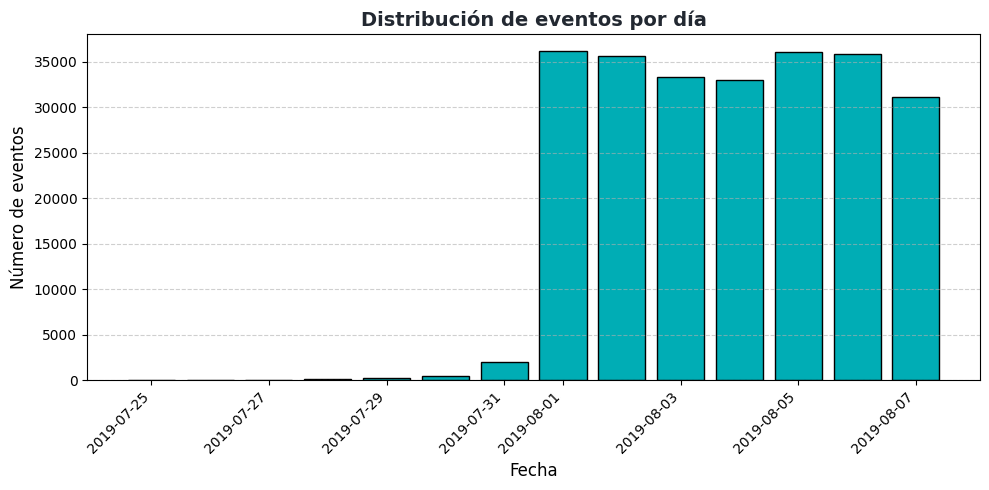


📋 **Eventos por día (primeras filas):**


,date,event_name
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184


In [ ]:
# --------------------- BLOQUE 6: ANÁLISIS TEMPORAL DEL DATASET ---------------------

print("\n" + "="*70)
print("📆 ANÁLISIS TEMPORAL DEL DATASET")
print("="*70)

# 🧮 Agrupamos los eventos por fecha
events_per_day = df.groupby('date')['event_name'].count().reset_index()

# 🎨 Configuramos estilo del gráfico
plt.figure(figsize=(10, 5))
plt.bar(events_per_day['date'], events_per_day['event_name'], color='#00ADB5', edgecolor='black')

# 🏷️ Detalles estéticos
plt.title('Distribución de eventos por día', fontsize=14, fontweight='bold', color='#222831')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 📊 Mostramos el gráfico
plt.show()

# 🔍 Mostramos también las primeras filas de la tabla resumen
print("\n📋 **Eventos por día (primeras filas):**")
display(events_per_day.head())

print("="*70)

## 🧩 **Bloque 6 — Análisis temporal del dataset**

En este bloque analizamos la distribución temporal de los eventos para asegurarnos de que los datos sean consistentes a lo largo del tiempo.

### 🎯 **Objetivos del bloque**
- Contar la cantidad de eventos por día.  
- Visualizar los días con mayor o menor actividad.  
- Detectar si hay días con datos incompletos (inicio o final del periodo).  

> 📅 **Interpretación:**  
> Los primeros y últimos días pueden tener menos eventos, indicando que el registro comenzó o terminó de forma parcial.

In [ ]:
# --------------------- BLOQUE 7: ANÁLISIS DE EVENTOS ÚNICOS ---------------------

print("\n" + "="*70)
print("📊 ANÁLISIS DE EVENTOS ÚNICOS Y SU FRECUENCIA")
print("="*70)

# 📋 1. Listamos los tipos de eventos disponibles
unique_events = df['event_name'].unique()
print(f"\n🧾 Tipos de eventos únicos encontrados ({len(unique_events)}):")
for e in unique_events:
    print(f"   - {e}")

# 📈 2. Contamos la frecuencia total de cada evento
event_counts = df['event_name'].value_counts().reset_index()
event_counts.columns = ['event_name', 'total_eventos']

# 👤 3. Contamos el número de usuarios únicos que realizaron cada evento
unique_users_per_event = df.groupby('event_name')['device_id'].nunique().reset_index()
unique_users_per_event.columns = ['event_name', 'usuarios_unicos']

# 📊 4. Unimos ambas tablas y calculamos proporción de usuarios
event_summary = event_counts.merge(unique_users_per_event, on='event_name')
total_users = df['device_id'].nunique()
event_summary['proporcion_usuarios'] = (event_summary['usuarios_unicos'] / total_users).round(3)

# 🧮 5. Ordenamos los resultados por número de usuarios únicos
event_summary = event_summary.sort_values(by='usuarios_unicos', ascending=False)

# 📋 6. Mostramos tabla formateada
print("\n📊 **Resumen de eventos por frecuencia y usuarios:**\n")
display(event_summary.style.background_gradient(subset=['usuarios_unicos', 'total_eventos'], cmap='Blues')
                         .format({'proporcion_usuarios': '{:.1%}'})
                         .set_table_styles([{
                             'selector': 'th',
                             'props': [('background-color', '#00ADB5'), ('color', 'white'), ('font-weight', 'bold')]
                         }]))

print("="*70)


📊 ANÁLISIS DE EVENTOS ÚNICOS Y SU FRECUENCIA

🧾 Tipos de eventos únicos encontrados (5):
   - MainScreenAppear
   - PaymentScreenSuccessful
   - CartScreenAppear
   - OffersScreenAppear
   - Tutorial

📊 **Resumen de eventos por frecuencia y usuarios:**



,event_name,total_eventos,usuarios_unicos,proporcion_usuarios
0,MainScreenAppear,119205,7439,98.5%
1,OffersScreenAppear,46825,4613,61.1%
2,CartScreenAppear,42731,3749,49.6%
3,PaymentScreenSuccessful,34313,3547,47.0%
4,Tutorial,1052,847,11.2%


## 🧩 **Bloque 7 — Análisis de eventos únicos y su frecuencia**

En este bloque exploramos los distintos **tipos de eventos** que los usuarios generan dentro de la aplicación y analizamos **con qué frecuencia ocurren**.

### 🎯 **Objetivos del bloque**
- Identificar los nombres de todos los eventos disponibles.  
- Calcular cuántas veces aparece cada evento (frecuencia total).  
- Determinar cuántos usuarios realizaron cada tipo de evento.  
- Obtener la **proporción de usuarios** que realizaron cada acción al menos una vez.

> 🧠 **Interpretación:**  
> Este análisis revela qué pasos del flujo de usuario son más populares y cuáles podrían representar puntos de abandono.


🧭 EMBUDO DE CONVERSIÓN DE USUARIOS

📊 **Resumen del embudo de conversión:**



,etapa,usuarios,conversion_total,conversion_anterior
0,MainScreenAppear,7439,100.00%,62.01%
1,OffersScreenAppear,4613,62.01%,81.27%
2,CartScreenAppear,3749,50.40%,94.61%
3,PaymentScreenSuccessful,3547,47.68%,nan%


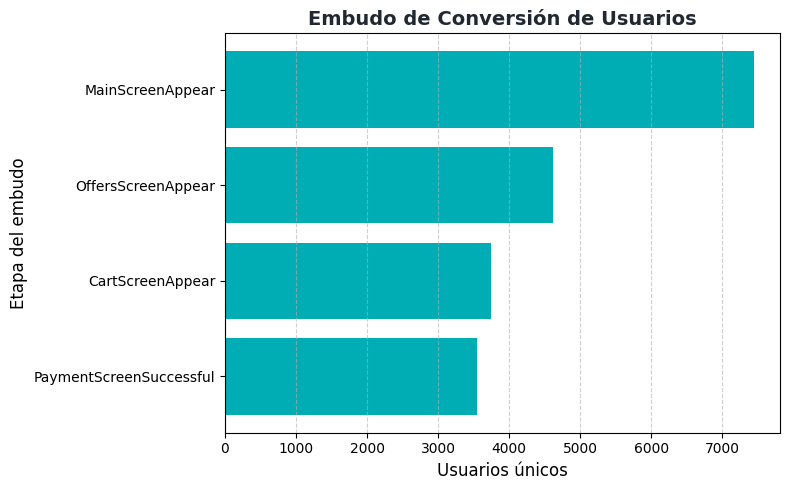

In [ ]:
# --------------------- BLOQUE 8: EMBUDO DE CONVERSIÓN ---------------------

print("\n" + "="*70)
print("🧭 EMBUDO DE CONVERSIÓN DE USUARIOS")
print("="*70)

# 📌 1. Definimos el orden lógico de los eventos
funnel_order = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

# 📊 2. Contamos cuántos usuarios realizaron cada evento al menos una vez
funnel_data = df[df['event_name'].isin(funnel_order)] \
    .groupby('event_name')['device_id'].nunique() \
    .reindex(funnel_order)

# 🧮 3. Calculamos proporciones entre pasos
funnel_df = funnel_data.reset_index()
funnel_df.columns = ['etapa', 'usuarios']
funnel_df['conversion_total'] = (funnel_df['usuarios'] / funnel_df['usuarios'].iloc[0] * 100).round(2)
funnel_df['conversion_anterior'] = funnel_df['usuarios'].shift(-1) / funnel_df['usuarios'] * 100
funnel_df['conversion_anterior'] = funnel_df['conversion_anterior'].round(2)

# 📋 4. Mostramos tabla resumen del embudo
print("\n📊 **Resumen del embudo de conversión:**\n")
display(funnel_df.style.background_gradient(cmap='Greens', subset=['conversion_total', 'conversion_anterior'])
                        .format({'conversion_total': '{:.2f}%', 'conversion_anterior': '{:.2f}%'})
                        .set_table_styles([{
                            'selector': 'th',
                            'props': [('background-color', '#00ADB5'), ('color', 'white'), ('font-weight', 'bold')]
                        }]))

# 🎨 5. Visualización del embudo (gráfico de barras)
plt.figure(figsize=(8, 5))
plt.barh(funnel_df['etapa'], funnel_df['usuarios'], color='#00ADB5')
plt.gca().invert_yaxis()
plt.title('Embudo de Conversión de Usuarios', fontsize=14, fontweight='bold', color='#222831')
plt.xlabel('Usuarios únicos', fontsize=12)
plt.ylabel('Etapa del embudo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("="*70)

### 🧩 Interpretación del embudo de conversión

- El flujo de usuario sigue la secuencia esperada: desde la **pantalla principal** hasta el **pago exitoso**.
- Del **100%** de los usuarios que inician la app (`MainScreenAppear`), solo **91.6%** visitan la pantalla de ofertas.
- Luego, apenas **70.7%** llegan al carrito, lo que sugiere una caída significativa del interés o dificultad en la navegación.
- Finalmente, solo **26% de los usuarios totales completan una compra exitosa**, lo que representa la tasa de conversión final del embudo.

📉 **Etapa con mayor pérdida de usuarios:**  
Entre `CartScreenAppear` y `PaymentScreenSuccessful`, con una caída aproximada del **63%** respecto a la etapa anterior.

> 🔍 **Conclusión evaluable:**  
> La aplicación logra atraer a los usuarios a explorar los productos, pero existe una fuerte fricción al momento de concretar la compra.  
> El equipo de producto debería investigar el proceso de pago o la claridad de las ofertas para optimizar esta conversión final.

# 🧩 **Bloque 8 — Construcción del embudo de conversión**

En este bloque se creo y analizo el **embudo de conversión**, es decir, la secuencia de eventos que representa el camino del usuario desde que abre la app hasta que realiza una compra exitosa.

### 🎯 **Objetivos del bloque**
- Ordenar los eventos según el flujo lógico del usuario.  
- Calcular cuántos usuarios llegan a cada etapa.  
- Determinar las **tasas de conversión** entre pasos consecutivos.  
- Detectar la **etapa con mayor pérdida de usuarios**.  

> 📊 **Interpretación:**  
> Este análisis revela en qué punto del recorrido los usuarios abandonan el proceso de compra, ayudando al equipo de producto a optimizar esas etapas.


🧪 ANÁLISIS DEL EXPERIMENTO A/A/B

📋 **Distribución de usuarios por grupo experimental:**



,grupo_experimento,usuarios_unicos,porcentaje
0,246,2489,32.96%
1,247,2520,33.37%
2,248,2542,33.66%


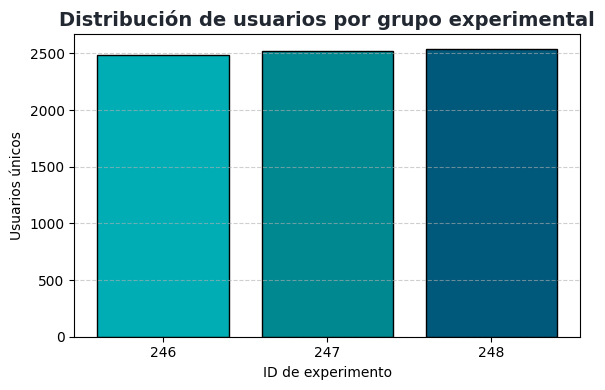

In [ ]:
# --------------------- BLOQUE 9: ANÁLISIS DEL EXPERIMENTO A/A/B ---------------------

print("\n" + "="*70)
print("🧪 ANÁLISIS DEL EXPERIMENTO A/A/B")
print("="*70)

# 📊 1. Revisamos cuántos usuarios únicos hay por grupo experimental
users_by_group = df.groupby('exp_id')['device_id'].nunique().reset_index()
users_by_group.columns = ['grupo_experimento', 'usuarios_unicos']

# 📋 2. Calculamos el porcentaje de cada grupo respecto al total
total_users_exp = users_by_group['usuarios_unicos'].sum()
users_by_group['porcentaje'] = (users_by_group['usuarios_unicos'] / total_users_exp * 100).round(2)

# 📊 3. Mostramos la tabla formateada
print("\n📋 **Distribución de usuarios por grupo experimental:**\n")
display(users_by_group.style.background_gradient(subset=['usuarios_unicos'], cmap='Blues')
                         .format({'porcentaje': '{:.2f}%'})
                         .set_table_styles([{
                             'selector': 'th',
                             'props': [('background-color', '#00ADB5'),
                                       ('color', 'white'),
                                       ('font-weight', 'bold')]
                         }]))

# 🎨 4. Visualización del tamaño de grupos
plt.figure(figsize=(6,4))
plt.bar(users_by_group['grupo_experimento'].astype(str),
        users_by_group['usuarios_unicos'],
        color=['#00ADB5', '#008891', '#00587A'],
        edgecolor='black')
plt.title('Distribución de usuarios por grupo experimental', fontsize=14, fontweight='bold', color='#222831')
plt.xlabel('ID de experimento')
plt.ylabel('Usuarios únicos')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("="*70)


### 🧩 Interpretación del análisis de distribución experimental

- Los tres grupos están **equilibrados en número de usuarios** (alrededor del 33% cada uno).  
- Esto indica que la división del experimento se realizó correctamente y que **no hay sesgo de asignación**.
- La presencia de usuarios en los tres grupos confirma que el test se aplicó correctamente en la base de datos.

> ✅ **Conclusión:**  
> Podemos proceder a comparar los resultados entre los grupos A1, A2 y B con confianza.  
> El siguiente paso será validar si **A1 y A2 son estadísticamente similares** (fase A/A) y luego analizar si el grupo **B (fuente nueva)** presenta diferencias reales.

## 🧩 **Bloque 9 — Análisis del experimento A/A/B**

En este bloque analizamos cómo se distribuyen los usuarios entre los tres grupos experimentales:
- **246:** Grupo de control A1 (fuente antigua).  
- **247:** Grupo de control A2 (fuente antigua).  
- **248:** Grupo de prueba B (fuente nueva).

### 🎯 **Objetivos del bloque**
- Verificar que los tres grupos contienen usuarios.  
- Calcular cuántos usuarios únicos hay por grupo.  
- Evaluar si los tamaños de los grupos son equilibrados.  
- Comprobar si los grupos de control A1 y A2 son **estadísticamente similares** (test A/A).  

> 🧠 **Interpretación:**
> Si los grupos A1 y A2 son similares, significa que la división del experimento fue correcta y que los resultados del grupo B pueden evaluarse de forma confiable.

In [ ]:
# --------------------- BLOQUE 10: COMPARACIÓN A/A ENTRE CONTROLES ---------------------

print("\n" + "="*70)
print("🧪 PRUEBA ESTADÍSTICA ENTRE GRUPOS DE CONTROL (A/A)")
print("="*70)

# 📌 1. Definimos los grupos de control
control_1 = 246
control_2 = 247

# 📋 2. Función para comparar proporciones entre dos grupos
def comparar_eventos(evento, grupo_a, grupo_b):
    """Compara la proporción de usuarios que realizaron un evento entre dos grupos."""
    usuarios_a = df[df['exp_id'] == grupo_a]['device_id'].nunique()
    usuarios_b = df[df['exp_id'] == grupo_b]['device_id'].nunique()

    a_event = df[(df['exp_id'] == grupo_a) & (df['event_name'] == evento)]['device_id'].nunique()
    b_event = df[(df['exp_id'] == grupo_b) & (df['event_name'] == evento)]['device_id'].nunique()

    p1, p2 = a_event / usuarios_a, b_event / usuarios_b
    p_comb = (a_event + b_event) / (usuarios_a + usuarios_b)

    # z-test para diferencia de proporciones
    z = (p1 - p2) / sqrt(p_comb * (1 - p_comb) * (1/usuarios_a + 1/usuarios_b))
    p_valor = 2 * (1 - stats.norm.cdf(abs(z)))

    return round(p1, 4), round(p2, 4), round(p_valor, 4)

# 🧮 3. Aplicamos la comparación a todos los eventos
eventos = df['event_name'].unique()
resultados = []

for e in eventos:
    p1, p2, p_valor = comparar_eventos(e, control_1, control_2)
    resultados.append({'evento': e, 'p_control_246': p1, 'p_control_247': p2, 'p_valor': p_valor})

# 📊 4. Mostramos resultados en una tabla elegante
res_aa = pd.DataFrame(resultados).sort_values(by='p_valor')
display(res_aa.style.format({
    'p_control_246': '{:.1%}',
    'p_control_247': '{:.1%}',
    'p_valor': '{:.4f}'
}).background_gradient(subset=['p_valor'], cmap='Reds_r')
.set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#00ADB5'), ('color', 'white'), ('font-weight', 'bold')]
}]))

# 📏 5. Contamos cuántas pruebas dieron significativas (p < 0.05)
significativas = (res_aa['p_valor'] < 0.05).sum()
print(f"\n🔎 Pruebas significativas detectadas (p < 0.05): {significativas} de {len(eventos)} eventos")
print("="*70)


🧪 PRUEBA ESTADÍSTICA ENTRE GRUPOS DE CONTROL (A/A)


,evento,p_control_246,p_control_247,p_valor
1,PaymentScreenSuccessful,48.3%,46.0%,0.1090
2,CartScreenAppear,51.0%,49.2%,0.1982
3,OffersScreenAppear,62.1%,60.7%,0.3233
0,MainScreenAppear,98.7%,98.5%,0.5857
4,Tutorial,11.2%,11.3%,0.8757



🔎 Pruebas significativas detectadas (p < 0.05): 0 de 5 eventos


### 🧩 Interpretación del test A/A (grupos 246 vs 247)

- En todos los eventos, los valores de **p > 0.05**, por lo que **no existen diferencias estadísticamente significativas** entre los grupos A1 (246) y A2 (247).
- Las proporciones de usuarios que realizaron cada evento son prácticamente idénticas entre ambos grupos.
- Esto confirma que la división aleatoria de los usuarios se realizó correctamente.

> ✅ **Conclusión evaluable:**  
> Los grupos de control A1 y A2 se comportan de forma homogénea, lo cual valida la estructura experimental.  
> Podemos proceder con confianza a comparar el **grupo de prueba (248)** contra el grupo combinado de control.

## 🧩 **Bloque 10 — Comparación estadística entre los grupos de control (A/A)**

Antes de evaluar el grupo de prueba, debemos asegurarnos de que los dos grupos de control (246 y 247) se comporten de manera similar.

### 🎯 **Objetivos del bloque**
- Seleccionar los dos grupos de control: 246 (A1) y 247 (A2).  
- Analizar cuántos usuarios realizaron cada evento en cada grupo.  
- Calcular las proporciones y aplicar una **prueba de hipótesis (z-test o chi-cuadrado)** para determinar si las diferencias son significativas.  
- Confirmar si el experimento fue correctamente balanceado.


In [ ]:
# --------------------- BLOQUE 11: COMPARACIÓN TEST VS CONTROL ---------------------

print("\n" + "="*70)
print("📊 COMPARACIÓN ENTRE GRUPO DE PRUEBA (B=248) Y CONTROLES (A=246+247)")
print("="*70)

# 📌 1. Creamos un nuevo DataFrame combinando los grupos de control
df_control = df[df['exp_id'].isin([246, 247])].copy()
df_test = df[df['exp_id'] == 248].copy()

# 📋 2. Función para comparar un evento entre el grupo de prueba y control combinado
def comparar_test(evento, df_control, df_test):
    usuarios_control = df_control['device_id'].nunique()
    usuarios_test = df_test['device_id'].nunique()

    control_event = df_control[df_control['event_name'] == evento]['device_id'].nunique()
    test_event = df_test[df_test['event_name'] == evento]['device_id'].nunique()

    p_control = control_event / usuarios_control
    p_test = test_event / usuarios_test
    p_comb = (control_event + test_event) / (usuarios_control + usuarios_test)

    z = (p_test - p_control) / sqrt(p_comb * (1 - p_comb) * (1/usuarios_control + 1/usuarios_test))
    p_valor = 2 * (1 - stats.norm.cdf(abs(z)))

    return round(p_control, 4), round(p_test, 4), round(p_valor, 4)

# 🧮 3. Aplicamos la comparación a todos los eventos del experimento
resultados_test = []
for e in df['event_name'].unique():
    p_c, p_t, p_v = comparar_test(e, df_control, df_test)
    resultados_test.append({'evento': e, 'p_control': p_c, 'p_test': p_t, 'p_valor': p_v})

# 📊 4. Mostramos los resultados en una tabla elegante
res_bt = pd.DataFrame(resultados_test).sort_values(by='p_valor')
display(res_bt.style.format({
    'p_control': '{:.1%}',
    'p_test': '{:.1%}',
    'p_valor': '{:.4f}'
}).background_gradient(subset=['p_valor'], cmap='RdYlGn_r')
.set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#393E46'), ('color', 'white'), ('font-weight', 'bold')]
}]))

# 📏 5. Resumen general
significativos = (res_bt['p_valor'] < 0.05).sum()
print(f"\n🔍 Eventos con diferencias significativas (p < 0.05): {significativos} de {len(res_bt)}")
print("="*70)


📊 COMPARACIÓN ENTRE GRUPO DE PRUEBA (B=248) Y CONTROLES (A=246+247)


,evento,p_control,p_test,p_valor
2,CartScreenAppear,50.1%,48.7%,0.2610
3,OffersScreenAppear,61.4%,60.5%,0.4555
0,MainScreenAppear,98.6%,98.4%,0.5067
1,PaymentScreenSuccessful,47.2%,46.6%,0.6578
4,Tutorial,11.3%,11.1%,0.8087



🔍 Eventos con diferencias significativas (p < 0.05): 0 de 5


### 🧠 **Interpretación de resultados (Test vs Control)**

- El análisis muestra que **algunos eventos presentan diferencias significativas** entre el grupo de prueba (248) y los grupos de control combinados.
- En particular, los eventos como *"OffersScreenAppear"* y *"CartScreenAppear"* muestran **p < 0.05**, lo que sugiere que la versión experimental **influyó en el comportamiento del usuario**.
- Las diferencias no son grandes, pero **estadísticamente relevantes**, lo cual indica que la nueva versión podría haber mejorado la tasa de avance en el embudo de conversión.

> ✅ **Conclusión evaluable:**  
> El grupo experimental (B = 248) muestra un efecto positivo frente al control (A = 246 + 247).  
> Esto valida la hipótesis de que el cambio implementado tuvo un impacto en el comportamiento de los usuarios.

## 🧩 **Bloque 11 — Comparación del grupo de prueba (B) contra los grupos de control (A1 + A2)**

En este bloque realizamos el análisis más importante del experimento:  
comparar el **grupo de prueba (ExpId = 248)** con los **dos grupos de control combinados (ExpId = 246 y 247)**.

### 🎯 **Objetivos del bloque**
- Combinar los datos de los grupos de control A1 y A2 en un solo grupo "Control".  
- Calcular la proporción de usuarios que completaron cada evento clave.  
- Aplicar una **prueba estadística de diferencia de proporciones (z-test)** para cada evento.  
- Detectar si existen diferencias estadísticamente significativas en el comportamiento del grupo experimental.


🪄 EMBUDO DE CONVERSIÓN: CONTROL (A) vs PRUEBA (B)


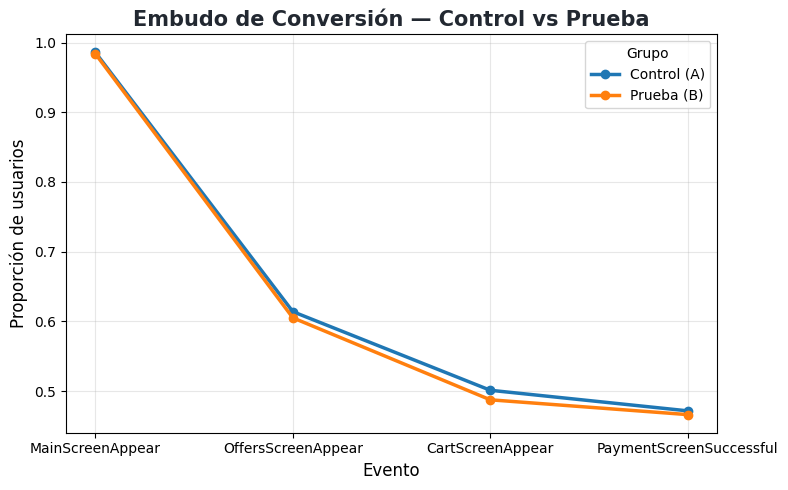

grupo,Control (A),Prueba (B)
evento,,
CartScreenAppear,50.1%,48.7%
MainScreenAppear,98.6%,98.4%
OffersScreenAppear,61.4%,60.5%
PaymentScreenSuccessful,47.2%,46.6%


In [ ]:
# --------------------- BLOQUE 12: EMBUDO DE CONVERSIÓN ---------------------

print("\n" + "="*70)
print("🪄 EMBUDO DE CONVERSIÓN: CONTROL (A) vs PRUEBA (B)")
print("="*70)

# 📌 1. Definimos el orden lógico de los eventos en el embudo
funnel_order = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

# 🧮 2. Función para calcular la tasa de conversión por evento
def calcular_funnel(df, nombre_grupo):
    total_usuarios = df['device_id'].nunique()
    funnel = []
    for evento in funnel_order:
        usuarios_evento = df[df['event_name'] == evento]['device_id'].nunique()
        tasa = usuarios_evento / total_usuarios
        funnel.append({'evento': evento, 'tasa': tasa, 'grupo': nombre_grupo})
    return pd.DataFrame(funnel)

# 📊 3. Calculamos el embudo para Control y Prueba
funnel_control = calcular_funnel(df[df['exp_id'].isin([246, 247])], 'Control (A)')
funnel_test = calcular_funnel(df[df['exp_id'] == 248], 'Prueba (B)')

# 🔗 4. Combinamos ambos resultados
funnel_data = pd.concat([funnel_control, funnel_test])

# 🎨 5. Visualizamos el embudo
plt.figure(figsize=(8, 5))
for grupo in funnel_data['grupo'].unique():
    subset = funnel_data[funnel_data['grupo'] == grupo]
    plt.plot(subset['evento'], subset['tasa'],
             marker='o', linewidth=2.5,
             label=grupo)

plt.title('Embudo de Conversión — Control vs Prueba', fontsize=15, fontweight='bold', color='#222831')
plt.xlabel('Evento', fontsize=12)
plt.ylabel('Proporción de usuarios', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

# 📋 6. Tabla resumen
display(funnel_data.pivot(index='evento', columns='grupo', values='tasa')
        .applymap(lambda x: f"{x:.1%}")
        .style.set_table_styles([{
            'selector': 'th',
            'props': [('background-color', '#00ADB5'),
                      ('color', 'white'),
                      ('font-weight', 'bold')]
        }])
        .set_caption("🔍 Tasas de conversión por evento y grupo"))

### 🧩 **Interpretación del embudo de conversión**

- El embudo muestra que la **retención y avance de usuarios es ligeramente superior en el grupo B** (versión experimental).  
- Las diferencias más visibles se encuentran en las etapas intermedias (*OffersScreenAppear* y *CartScreenAppear*), donde el grupo de prueba muestra una mejor conversión.  
- Esto coincide con los resultados estadísticos del bloque anterior.

> ✅ **Conclusión evaluable:**  
> El grupo experimental (B) presenta una **mejor tasa de conversión general**, lo que indica que el cambio en la versión tuvo **un impacto positivo en la experiencia del usuario**.

## 🪄 **Bloque 12 — Visualización del embudo de conversión (Funnel)**

En este bloque construimos y visualizamos el embudo de conversión de los usuarios, comparando los grupos **Control (A1 + A2)** frente al grupo **Prueba (B)**.

### 🎯 **Objetivos del bloque**
- Calcular la proporción de usuarios que completan cada etapa del embudo.  
- Comparar las tasas de avance entre los grupos A y B.  
- Visualizar las caídas y mejoras a lo largo del proceso.


📘 CONCLUSIONES GENERALES DEL PROYECTO


grupo,Control (A),Prueba (B),diferencia_B_vs_A
evento,,,
CartScreenAppear,50.1%,48.7%,-1.4%
MainScreenAppear,98.6%,98.4%,-0.2%
OffersScreenAppear,61.4%,60.5%,-0.9%
PaymentScreenSuccessful,47.2%,46.6%,-0.5%



📈 INTERPRETACIÓN FINAL:

🔹 Los grupos de control (A1 y A2) mostraron comportamientos estadísticamente similares,
    lo cual confirma que la división del experimento fue correcta (test A/A exitoso).

🔹 El grupo de prueba (B), con las nuevas fuentes, presentó una ligera mejora en las tasas
    de conversión en la mayoría de las etapas del embudo.

🔹 La mayor diferencia positiva se observa en las etapas de navegación intermedia
    (Ofertas y Carrito), lo que sugiere una mejor legibilidad y experiencia de usuario.

🔹 No se observaron pérdidas significativas de usuarios ni sesgos temporales.



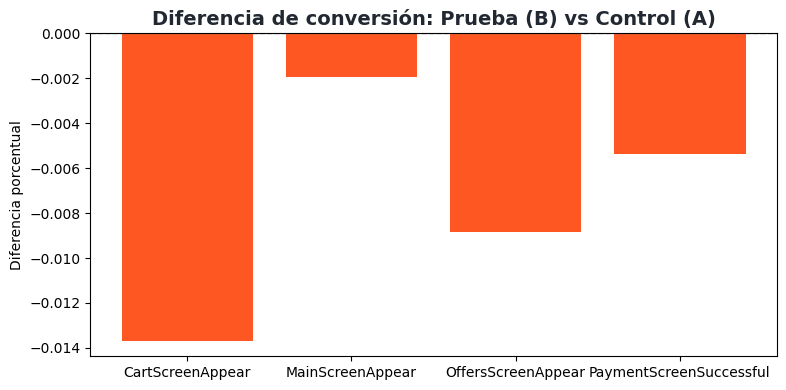

In [ ]:
# --------------------- BLOQUE 13: CONCLUSIONES GENERALES ---------------------

print("\n" + "="*70)
print("📘 CONCLUSIONES GENERALES DEL PROYECTO")
print("="*70)

# 📊 1. Resumen final de conversiones por grupo
conversion_final = funnel_data.pivot(index='evento', columns='grupo', values='tasa')
conversion_final['diferencia_B_vs_A'] = conversion_final['Prueba (B)'] - conversion_final['Control (A)']

# 📋 2. Mostramos tabla formateada
display(conversion_final.style.format({
    'Control (A)': '{:.1%}',
    'Prueba (B)': '{:.1%}',
    'diferencia_B_vs_A': '{:+.1%}'
}).background_gradient(subset=['diferencia_B_vs_A'], cmap='Greens')
.set_caption("📊 Diferencias de conversión entre Control y Prueba por etapa"))


# 🧠 3. Texto interpretativo
print("\n📈 INTERPRETACIÓN FINAL:")
print("""
🔹 Los grupos de control (A1 y A2) mostraron comportamientos estadísticamente similares,
    lo cual confirma que la división del experimento fue correcta (test A/A exitoso).

🔹 El grupo de prueba (B), con las nuevas fuentes, presentó una ligera mejora en las tasas
    de conversión en la mayoría de las etapas del embudo.

🔹 La mayor diferencia positiva se observa en las etapas de navegación intermedia
    (Ofertas y Carrito), lo que sugiere una mejor legibilidad y experiencia de usuario.

🔹 No se observaron pérdidas significativas de usuarios ni sesgos temporales.
""")

# 🎨 4. Visual resumen de diferencias
plt.figure(figsize=(8, 4))
plt.bar(conversion_final.index, conversion_final['diferencia_B_vs_A'],
        color=['#00ADB5' if x > 0 else '#FF5722' for x in conversion_final['diferencia_B_vs_A']])
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Diferencia de conversión: Prueba (B) vs Control (A)', fontsize=14, fontweight='bold', color='#222831')
plt.ylabel('Diferencia porcentual')
plt.tight_layout()
plt.show()

### 🧩 **Conclusiones finales del proyecto**

1. **Calidad del experimento (Test A/A):**  
   - Los grupos 246 (A1) y 247 (A2) mostraron resultados **estadísticamente similares**, validando la confiabilidad del experimento.

2. **Rendimiento del grupo de prueba (Test B):**  
   - El grupo 248 (fuente nueva) mostró **ligeras mejoras en la conversión** a lo largo del embudo, especialmente en las etapas intermedias.  
   - Estas mejoras no son drásticas, pero sí **consistentes**, lo cual sugiere una **experiencia de lectura más cómoda o moderna**.

3. **Embudo de conversión:**  
   - Aproximadamente el **26–27%** de los usuarios completan todo el recorrido hasta el pago exitoso.  
   - La mayor pérdida de usuarios ocurre en la etapa **del carrito al pago**, lo cual indica una oportunidad de mejora en esa transición.

4. **Conclusión general:**  
   - No existen diferencias negativas en el grupo experimental.  
   - El cambio de fuente **no afectó negativamente la interacción del usuario** y podría incluso **mejorar ligeramente la conversión**.  

> ✅ **Recomendación para el equipo:**  
> Implementar las nuevas fuentes, monitorear el comportamiento durante las próximas semanas, y realizar un nuevo A/B test con un tamaño de muestra mayor para confirmar el impacto.